#Principal Component Analysis (PCA)

In this notebook we will following a [tutorial](https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a) to show how to apply PCA to reduce dimensionality in datasets.

Steps involved in PCA

> * Standardize the data
> * Compute covariance matrix
> * Obtain the Eigenvectors and Eigenvalues from the covariance matrix
> * Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues
> * nstruct the projection matrix W from the selected k Eigenvectors
> * Transform the original data set X via W to obtain the new k-dimensional feature subspace Y









## Importing Libraries

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

## Iris Data

Reading Iris dataset from UCI

In [0]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

## Processing dataset

Setting columns name

In [0]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

Drop empty rows

In [0]:
df.dropna(how="all", inplace=True)

Let's see last five rows

In [6]:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Separate features and target columns

In [0]:
X = df.iloc[:,0:4].values # Features
y = df.iloc[:,4].values # Target

Features values

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Target values

In [9]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## Standardization

Sometimes, the scales used for the measurement in each feature can be different. In this cases we can standarize ***(mean=0, variance=1)*** the dataset because PCA is sensitive to variances

In [0]:
X_std = StandardScaler().fit_transform(X)

In [11]:
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Eigen Descomposition

Eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA:

> * The Eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.


### Covariance Matrix

Covariance is a matrix **dxd** where ***d is the number of features***, in this case will be a **4x4** matrix

In [0]:
cov_mat= np.cov(X_std, rowvar=False)

In [13]:
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

### Eigenvectors and Eigenvalues computation

To have a deeper understand is helpful some of the basic concepts of linear algebra

In [0]:
cov_mat = np.cov(X_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 

Eigenvectors

In [15]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

Eigenvalues

In [16]:
eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

### Eigen Vectors verification

As we know that the sum of the square of each value in an Eigenvector is 1. We can make a quick check to see if eigenvectors are computed correctly

In [17]:
sum(eig_vecs**2)

array([1., 1., 1., 1.])

## Selecting The Principal Components

Make a list of (eigenvalue, eigenvector) tuples

In [18]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs

[(2.930353775589317,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163944,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559593,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

Sort the tuple from high to low

In [19]:
eig_pairs.sort() 
eig_pairs.reverse()
eig_pairs

[(2.930353775589317,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163944,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559593,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

A useful measure to select the principal components is the so-called “explained variance,” which can be calculated from the eigenvalues. With this we will select the components with the higher weigth to approximate to **p-value**

In [20]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]

In this case we will select the first two components where they sum is ~ 95.80 (**p-value -> 0.95**)

## Construct the projection matrix W 

Now let's reduce the dimension of dataset using top-k eigenvectors, so our dataset will be **dxk-dimensional** dimension

In [21]:
matrix_w = np.hstack(
    (eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))
)
matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

##Projection Onto the New Feature Space

To transform our samples to the new subspace we should use **Y = XxW**

In [22]:
Y = X_std.dot(matrix_w) 
principalDf = pd.DataFrame(data = Y , columns = ['principal_component_1', 'principal_component_2']) 
principalDf.head()

,principal_component_1,principal_component_2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


Let's combine the target **y** to dataframe

In [23]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1) 
finalDf.head()

,principal_component_1,principal_component_2,species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


##Visualize 2D Projection


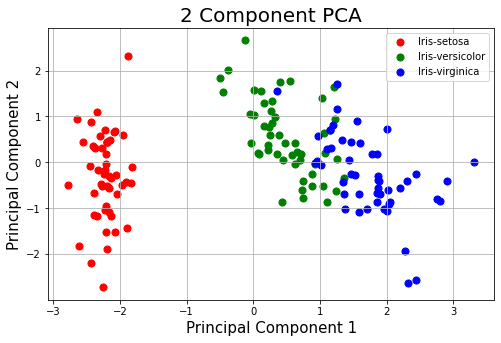

In [24]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['species'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal_component_1'],
        finalDf.loc[indicesToKeep, 'principal_component_2'],
        c = color,
        s = 50
    )
    ax.legend(targets)
    ax.grid()

## Compute PCA with library

We can calculate **PCA** importing PCA from sklearn.decomposition.

> * PCA(n_components=N) # N -> Number of components we want to keep
> * PCA(pValue) # pValue -> Number of the variance we want to keep in **.f** (.95) notation, in this way PCA will return the number N of components used

In [0]:
pca = PCA(.95)

Projection Onto the New Feature Space

In [0]:
principalComponents = pca.fit_transform(X_std) 

Gettind number of components wih numpy.ndarray.shape[1]

In [27]:
principalComponents.shape[1]

2

Create a dataframe with the new components

In [28]:
principalDf = pd.DataFrame(
    data = principalComponents,
    columns = ['principal_component_1', 'principal_component_2']
)

principalDf.head()

,principal_component_1,principal_component_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


Let's combine the target **y** to dataframe

In [29]:
finalDf = pd.concat([principalDf, finalDf[['species']]], axis = 1)
finalDf.head()

,principal_component_1,principal_component_2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
